In [26]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid'

import plotly.express as px

In [27]:
from matplotlib.pyplot import figure

In [28]:
df = pd.read_csv('../datasets/Space_Missions_Cleaned.csv')

## Issue : #10
# Company with most active rockets (with percent)

In [39]:
df_rocket = df[['Company Name', 'Status Rocket']]

In [40]:
df_rocket_active = df_rocket[df_rocket['Status Rocket'] == 'StatusActive']
df_rocket_active = df_rocket_active.groupby('Company Name').count()
df_active = df_rocket_active.rename(columns= {'Status Rocket': 'StatusActive'})
df_active.head()

,StatusActive
Company Name,
AEB,3
Arianespace,114
Blue Origin,12
Boeing,1
CASC,211


In [41]:
df_rocket_retired = df_rocket[df_rocket['Status Rocket'] == 'StatusRetired']
df_rocket_retired = df_rocket_retired.groupby('Company Name').count()
df_retired = df_rocket_retired.rename(columns={'Status Rocket': 'StatusRetired'})
df_retired.head()

,StatusRetired
Company Name,
AMBA,8
ASI,9
Arianespace,165
Arm??e de l'Air,4
Boeing,135


In [42]:
df_final = pd.merge(df_active, df_retired, on='Company Name', how='outer')
df_final = df_final.fillna(0)
df_final['StatusActive'] = df_final['StatusActive'].astype('int')
df_final['StatusRetired'] = df_final['StatusRetired'].astype('int')
df_final['Total Rocket'] = df_final['StatusActive'] + df_final['StatusRetired']
df_final['% StatusActive'] = df_final['StatusActive'] / df_final['Total Rocket']
df_final['% StatusRetired'] = df_final['StatusRetired'] / df_final['Total Rocket']
df_final.sort_values(by=['% StatusActive'], inplace=True, ascending=False)
df_final.reset_index(inplace=True)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
0,AEB,3,0,3,1.0,0.0
1,Khrunichev,1,0,1,1.0,0.0
2,Blue Origin,12,0,12,1.0,0.0
3,i-Space,1,0,1,1.0,0.0
4,Sea Launch,36,0,36,1.0,0.0


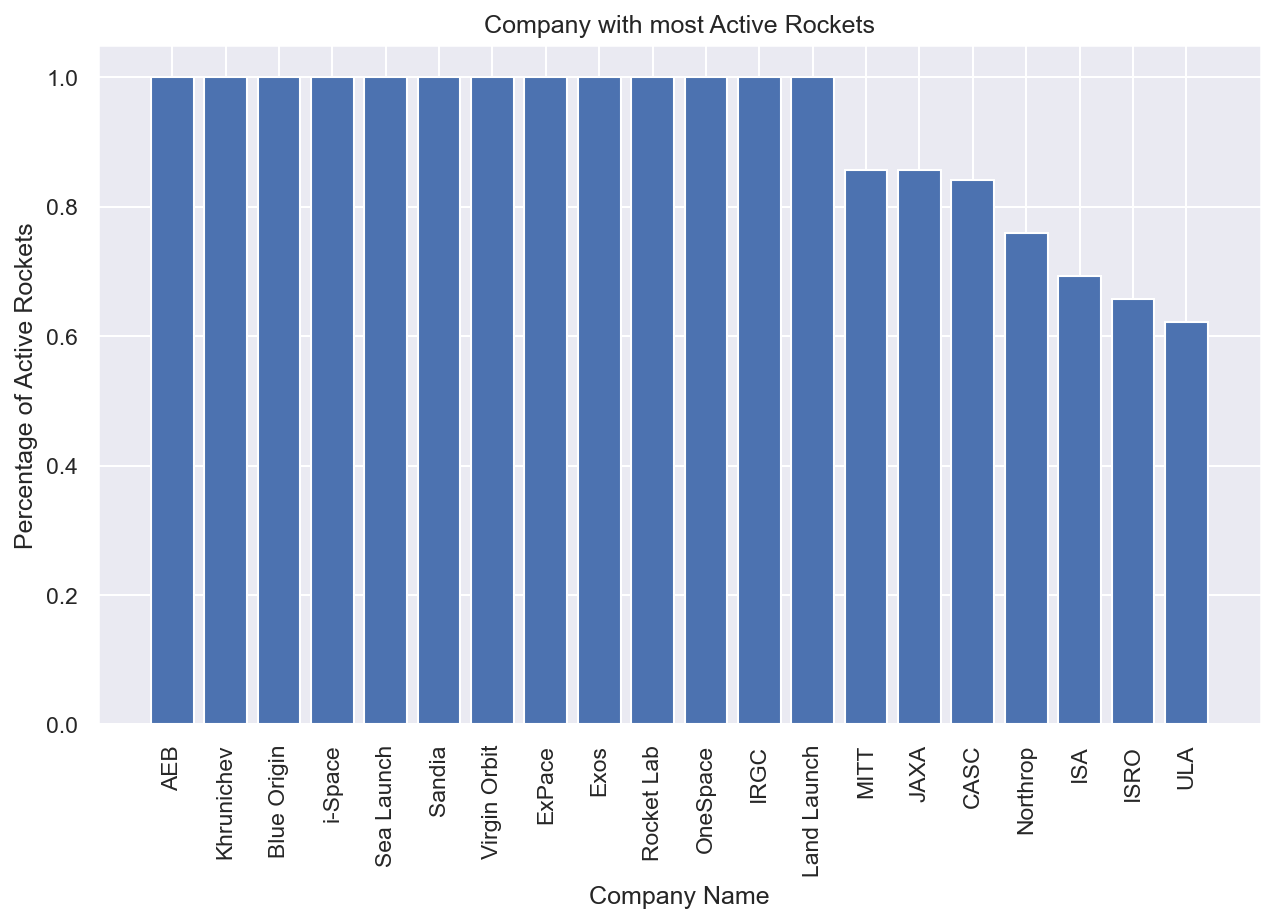

In [43]:
df_final_active_plot = df_final.head(20)

x = df_final_active_plot['Company Name']
y = df_final_active_plot['% StatusActive']

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Percentage of Active Rockets')
plt.title('Company with most Active Rockets')
plt.xticks(rotation=90)
plt.show()

## Issue : #11
# Company with most retired rockets (with percent)

In [44]:
df_final.sort_values(by=['% StatusRetired'], inplace=True, ascending=False)
#df_final.reset_index(inplace=True)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
55,Yuzhmash,0,2,2,0.0,1.0
42,Lockheed,0,79,79,0.0,1.0
31,Landspace,0,1,1,0.0,1.0
32,UT,0,5,5,0.0,1.0
33,US Navy,0,17,17,0.0,1.0


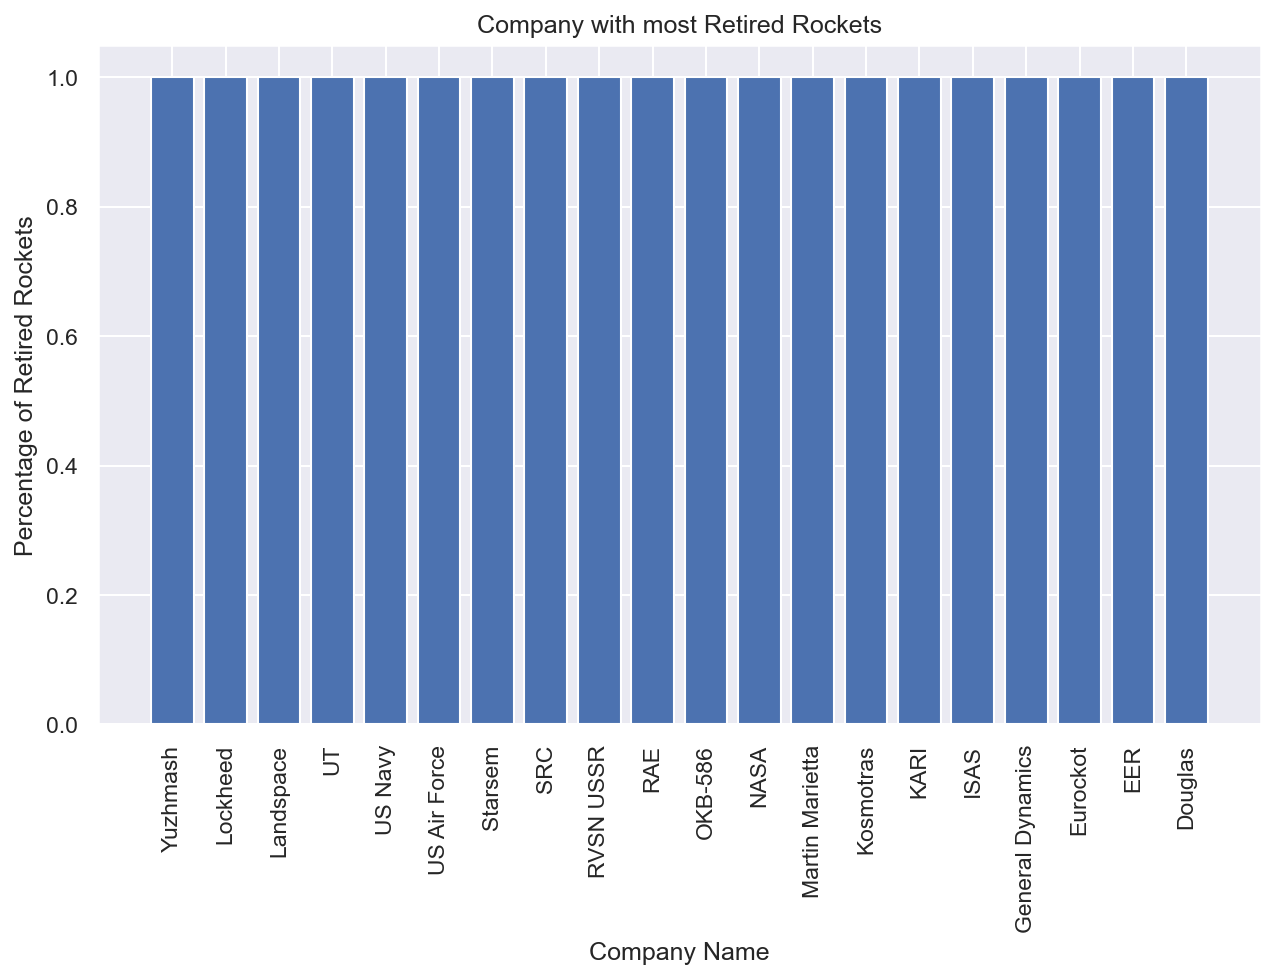

In [45]:
df_final_retired_plot = df_final.head(20)

x = df_final_retired_plot['Company Name']
y = df_final_retired_plot['% StatusRetired']

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Percentage of Retired Rockets')
plt.title('Company with most Retired Rockets')
plt.xticks(rotation=90)
plt.show()